In [4]:
#Load data
import pandas as pd

df = pd.read_csv('C:/Users/j/Documents/GitHub/Competitions/sales_data.csv')
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [5]:
#1. What are the total sales for each payment method?

#1.1 Add Total sale column to df
df['total_sales'] = df['quantity'] * df['unit_price']
print(df.head())

#1.2 Summarize total_sales by payment method

total_sales_by_payment = df.groupby('payment')['total_sales'].sum().sort_values(ascending = False)
print(total_sales_by_payment)

         date warehouse client_type           product_line  quantity  \
0  2021-06-01   Central      Retail          Miscellaneous         8   
1  2021-06-01     North      Retail        Breaking system         9   
2  2021-06-01     North      Retail  Suspension & traction         8   
3  2021-06-01     North   Wholesale           Frame & body        16   
4  2021-06-01   Central      Retail                 Engine         2   

   unit_price   total      payment  total_sales  
0       16.85  134.83  Credit card       134.80  
1       19.29  173.61         Cash       173.61  
2       32.93  263.45  Credit card       263.44  
3       37.84  605.44     Transfer       605.44  
4       60.48  120.96  Credit card       120.96  
payment
Transfer       159641.64
Credit card    110271.46
Cash            19199.06
Name: total_sales, dtype: float64


In [6]:
#2. What is the average unit price for each product line?

df.head(30)

product_line_avg_unit_price = df.groupby('product_line')['unit_price'].mean().sort_values(ascending = False)

print(product_line_avg_unit_price)

product_line
Engine                   60.091803
Frame & body             42.832229
Suspension & traction    33.969868
Electrical system        25.585130
Miscellaneous            22.810738
Breaking system          17.740522
Name: unit_price, dtype: float64


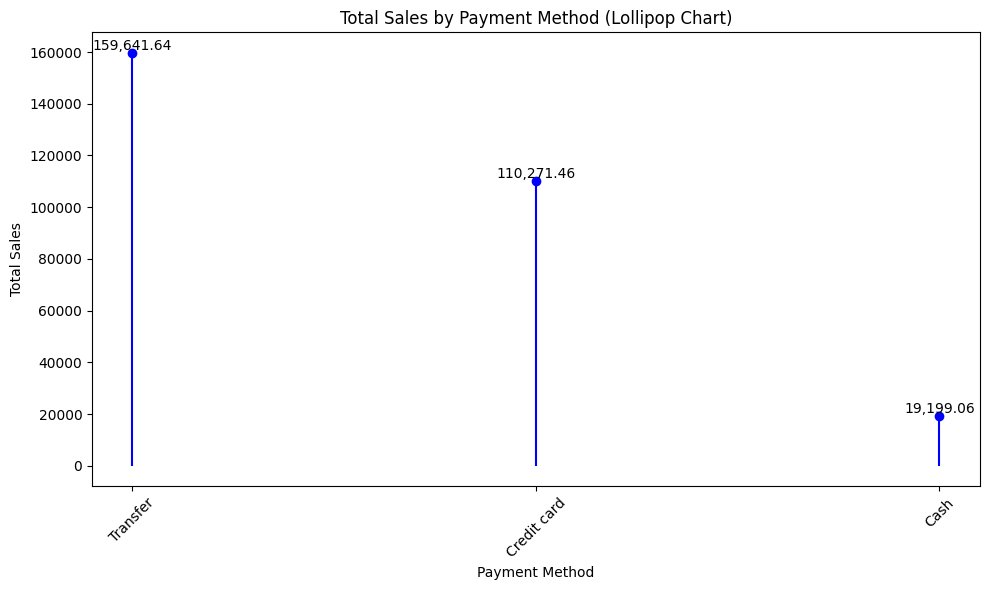

In [9]:
#3.1 Create plots to visualize findings for total sales for each payment method.

import matplotlib.pyplot as plt

# Prepare data for the lollipop chart
labels = total_sales_by_payment.index
sizes = total_sales_by_payment.values

# Create a lollipop chart
plt.figure(figsize=(10, 6))
# Plot the lines
plt.stem(labels, sizes, basefmt=" ", linefmt='-b', markerfmt='ob')

# Add titles and labels
plt.title('Total Sales by Payment Method (Lollipop Chart)')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')

# Annotate each lollipop with the total sales value
for i, value in enumerate(sizes):
    plt.text(i, value, f'{value:,.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

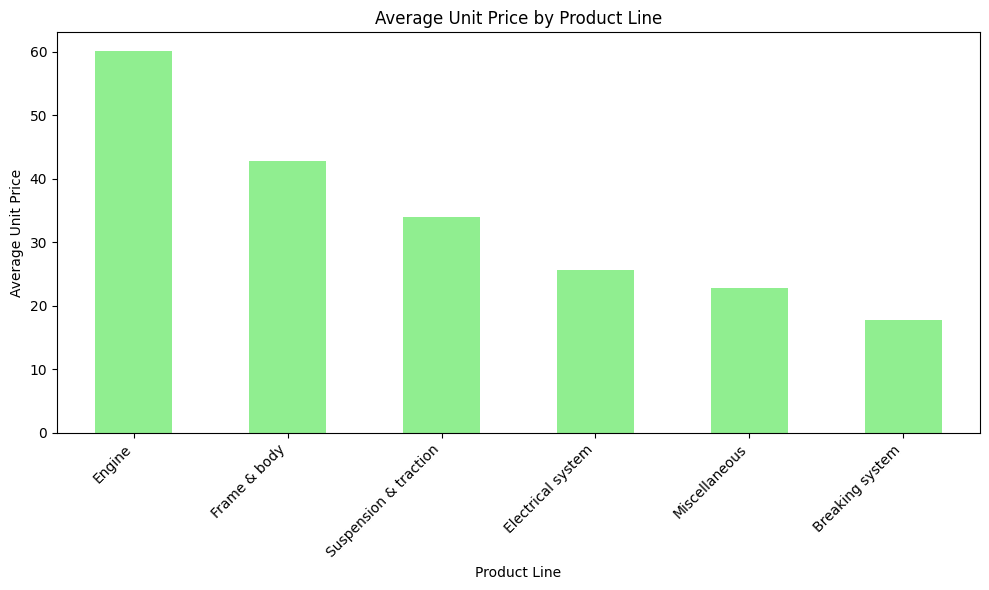

In [10]:
#3.2 Create plots to visualize findings for average unit price for each product line.

import matplotlib.pyplot as plt

# 2.1 Calculate the average unit price for each product line
product_line_avg_unit_price = df.groupby('product_line')['unit_price'].mean().sort_values(ascending=False)

# 2.2 Create a vertical bar chart for average unit price by product line
plt.figure(figsize=(10, 6))
product_line_avg_unit_price.plot(kind='bar', color='lightgreen')

# Add chart title and labels
plt.title('Average Unit Price by Product Line')
plt.ylabel('Average Unit Price')
plt.xlabel('Product Line')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

client_type
Wholesale    709.518400
Retail       167.058735
Name: total_sales, dtype: float64


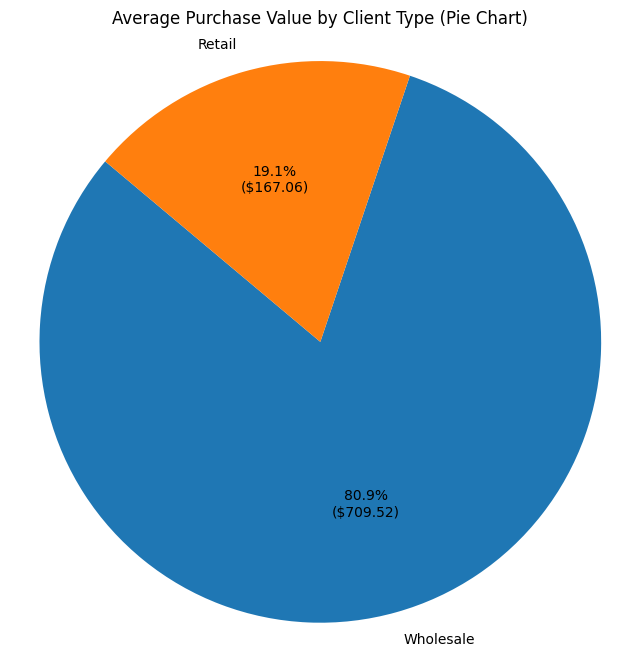

In [11]:
#4.1 Investigate further average purchase value by client type

import matplotlib.pyplot as plt

# Calculate total sales for each client type (already done)
df['total_sales'] = df['quantity'] * df['unit_price']  # Ensure total sales column is available

# Average purchase value by client type
avg_purchase_value_by_client_type = df.groupby('client_type')['total_sales'].mean().sort_values(ascending=False)
print(avg_purchase_value_by_client_type)

# Create a pie chart for average purchase value by client type
plt.figure(figsize=(8, 8))
plt.pie(avg_purchase_value_by_client_type, 
        labels=avg_purchase_value_by_client_type.index, 
        autopct=lambda p: f'{p:.1f}%\n(${p * avg_purchase_value_by_client_type.sum() / 100:.2f})',  # Show both percentage and total
        startangle=140, 
        colors=plt.cm.tab10.colors)  # Use a color palette

# Add chart title
plt.title('Average Purchase Value by Client Type (Pie Chart)')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [12]:
#4.2.1 Investigate relationship between number of transactions and total sales per payment method

# Calculate number of transactions and total sales per payment method
num_transactions_by_payment = df['payment'].value_counts()
total_sales_by_payment = df.groupby('payment')['total_sales'].sum()

# Prepare data for the bubble plot
payment_types = total_sales_by_payment.index
num_transactions = num_transactions_by_payment[payment_types].values
sizes = total_sales_by_payment.values / 100  # Scale down sizes for better visualization

#Print values
print(num_transactions_by_payment)
print(total_sales_by_payment)

Credit card    659
Transfer       225
Cash           116
Name: payment, dtype: int64
payment
Cash            19199.06
Credit card    110271.46
Transfer       159641.64
Name: total_sales, dtype: float64


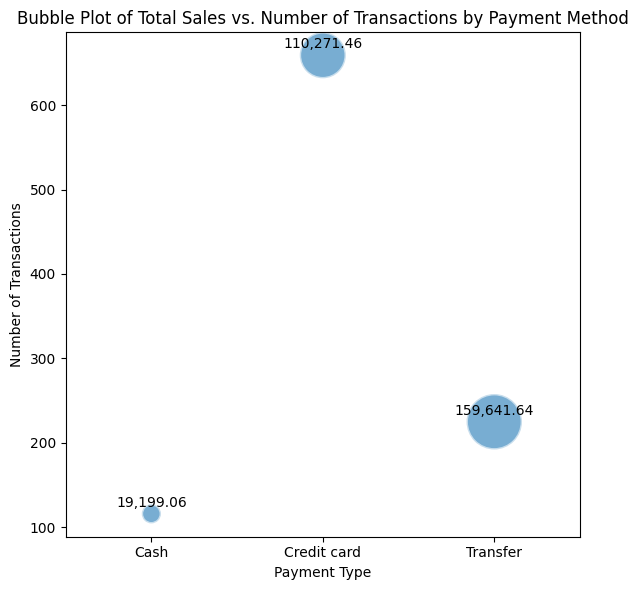

In [13]:
#4.2.2 Visualize relationship between number of transactions and total sales per payment method

import matplotlib.pyplot as plt

# Create a bubble plot with a narrower figure size
plt.figure(figsize=(6, 6))  # Adjusting the width to make it narrower
plt.scatter(payment_types, num_transactions, s=sizes, alpha=0.6, edgecolors="w", linewidth=2)

# Add titles and labels
plt.title('Bubble Plot of Total Sales vs. Number of Transactions by Payment Method')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')

# Annotate each bubble with the total sales value
for i, label in enumerate(payment_types):
    plt.annotate(f'{total_sales_by_payment[label]:,.2f}', 
                 (label, num_transactions[i]), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Set x-axis limits to bring values closer together
plt.xlim(-0.5, len(payment_types) - 0.5)  # Adjust based on the number of payment types

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [14]:
#4.3.1 Investigate further total sales value by product line

# Calculate total purchase value by product line
total_purchase_value_by_product_line = df.groupby('product_line')['total_sales'].sum().sort_values(ascending=False)

# Print the total purchase value by product line
print(total_purchase_value_by_product_line)

product_line
Suspension & traction    73014.36
Frame & body             69024.51
Electrical system        43612.72
Breaking system          38349.39
Engine                   37945.36
Miscellaneous            27165.82
Name: total_sales, dtype: float64


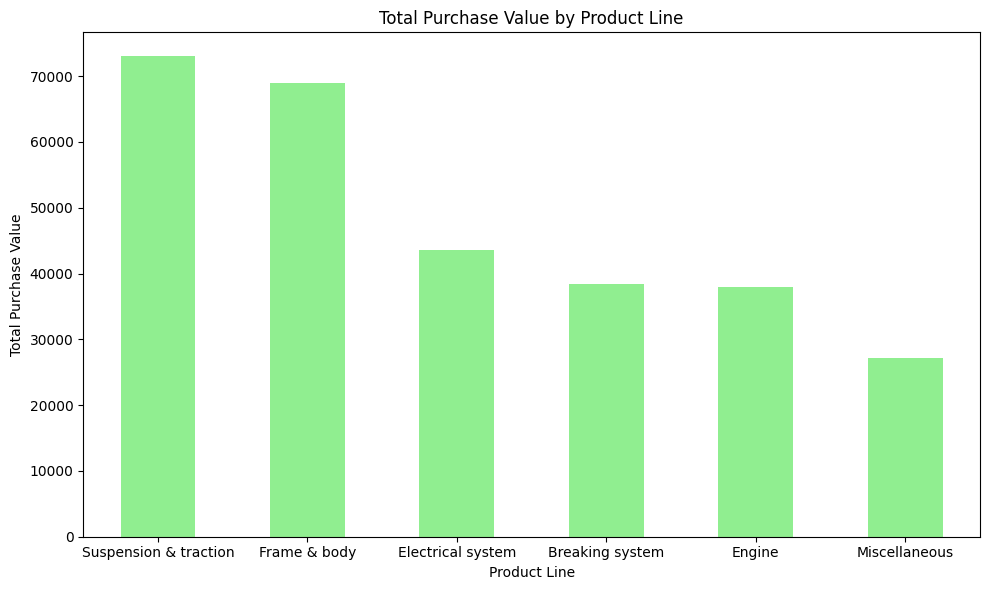

In [15]:
#4.3.2 Visualize total sales value by product line

import matplotlib.pyplot as plt

# Create a bar chart for total purchase value by product line
plt.figure(figsize=(10, 6))
total_purchase_value_by_product_line.plot(kind='bar', color='lightgreen')
plt.title('Total Purchase Value by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Purchase Value')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [26]:
'''# Summarize Findings

## Key Insights

1. **Transfer vs. Credit Card:**  
   Although Transfer transactions are fewer in number (225) compared to Credit Card transactions (659), they generate significantly higher total sales ($159,641.64 vs. $110,271.46). This indicates that customers using Transfers tend to make larger purchases.

2. **Wholesale Advantage:**  
   Wholesale clients have a much higher average purchase value ($709.52) compared to Retail clients ($167.06). This highlights the potential for targeted marketing strategies to enhance sales in the wholesale segment.

3. **Product Line Contribution:**  
   The Suspension & Traction line generates $73,014.36, and the Frame & Body line brings in $69,024.51, together accounting for about 49.6% of total sales. This concentration indicates strong demand and opportunities for targeted marketing.
'''

'# Summarize Findings\n\n## Key Insights\n\n1. **Transfer vs. Credit Card:**  \n   Although Transfer transactions are fewer in number (225) compared to Credit Card transactions (659), they generate significantly higher total sales ($159,641.64 vs. $110,271.46). This indicates that customers using Transfers tend to make larger purchases.\n\n2. **Wholesale Advantage:**  \n   Wholesale clients have a much higher average purchase value ($709.52) compared to Retail clients ($167.06). This highlights the potential for targeted marketing strategies to enhance sales in the wholesale segment.\n\n3. **Product Line Contribution:**  \n   The Suspension & Traction line generates $73,014.36, and the Frame & Body line brings in $69,024.51, together accounting for about 49.6% of total sales. This concentration indicates strong demand and opportunities for targeted marketing.\n'